### Performing ensemble simulations

With a functional `Ensemble` in hand, you're ready to perform simulations. In `medusa`, most simulations are performed by setting the model structure to represent an individual member, using cobrapy functions for the actual simulation, then repeating for all or many ensemble members.

## Ensemble Flux Balance Analysis

Flux balance analysis (FBA) is one of the most widely used techniques in systems biology. See [What is flux balance analysis?](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3108565/) for an introduction to FBA, and the [cobrapy documentation](https://cobrapy.readthedocs.io/en/latest/simulating.html) to see how FBA is performed with a single model.

When using `medusa` for FBA, the environmental conditions and objective function should be specified in `ensemble.base_model`, just as if it were a normal cobrapy `Model`:

In [1]:
import medusa
from medusa.test import create_test_ensemble

ensemble = create_test_ensemble("Staphylococcus aureus")

In [2]:
ensemble.base_model.objective.expression

1.0*bio1 - 1.0*bio1_reverse_b18f7

The current objective function is the biomass reaction (`bio1`)--to change this, just set the objective to another reaction. Let's change the objective to CO2 exchange, then change it back to biomass production:

In [3]:
ensemble.base_model.objective = 'EX_cpd00011_e'
print(ensemble.base_model.objective.expression)
ensemble.base_model.objective = 'bio1'
print(ensemble.base_model.objective.expression)

1.0*EX_cpd00011_e - 1.0*EX_cpd00011_e_reverse_896eb
1.0*bio1 - 1.0*bio1_reverse_b18f7


Similarly, you can manipulate the environmental conditions as in cobrapy. The base model for this example ensemble is from ModelSEED, so exchange reactions are specified with the `'EX_'` prefix, followed by the metabolite id. Let's take a look at the exchange reactions that are currently open:

In [4]:
medium = ensemble.base_model.medium
medium

{'EX_cpd00001_e': 1000.0,
 'EX_cpd00007_e': 1000.0,
 'EX_cpd00009_e': 1000.0,
 'EX_cpd00010_e': 1000.0,
 'EX_cpd00011_e': 1000.0,
 'EX_cpd00012_e': 1000.0,
 'EX_cpd00013_e': 1000,
 'EX_cpd00023_e': 1000.0,
 'EX_cpd00024_e': 1000.0,
 'EX_cpd00027_e': 1000.0,
 'EX_cpd00028_e': 1000.0,
 'EX_cpd00029_e': 1000,
 'EX_cpd00030_e': 1000.0,
 'EX_cpd00033_e': 1000.0,
 'EX_cpd00034_e': 1000.0,
 'EX_cpd00035_e': 1000.0,
 'EX_cpd00039_e': 1000.0,
 'EX_cpd00041_e': 1000.0,
 'EX_cpd00047_e': 1000.0,
 'EX_cpd00048_e': 1000.0,
 'EX_cpd00051_e': 1000.0,
 'EX_cpd00053_e': 1000.0,
 'EX_cpd00054_e': 1000.0,
 'EX_cpd00058_e': 1000.0,
 'EX_cpd00060_e': 1000.0,
 'EX_cpd00063_e': 1000.0,
 'EX_cpd00064_e': 1000.0,
 'EX_cpd00066_e': 1000.0,
 'EX_cpd00067_e': 1000.0,
 'EX_cpd00069_e': 1000.0,
 'EX_cpd00072_e': 1000,
 'EX_cpd00073_e': 1000.0,
 'EX_cpd00075_e': 1000.0,
 'EX_cpd00076_e': 1000.0,
 'EX_cpd00079_e': 1000,
 'EX_cpd00080_e': 1000.0,
 'EX_cpd00082_e': 1000.0,
 'EX_cpd00092_e': 1000.0,
 'EX_cpd00094_e': 10

That's a lot of open exchange reactions! Let's make them a bit more realistic for an *in vitro* situation. We'll load a file specifying the base composition of the media in biolog single C/N growth conditions, and set the media conditions to reflect that. The base composition is missing a carbon source, so we'll enable uptake of glucose. In the medium dictionary, the numbers for each exchange reaction are uptake rates. If you inspect the actual exchange reactions, you will find that the equivalent to an uptake rate of 1000 units is a lower bound of -1000, because our exchange reactions are defined with the boundary metabolite as the reactant, e.g. `cpd00182_e --> `.

In [5]:
import pandas as pd
biolog_base = pd.read_csv("../medusa/test/data/biolog_base_composition.csv", sep=",")
biolog_base

,Name,ID
0,H2O,cpd00001_e
1,O2,cpd00007_e
2,Phosphate,cpd00009_e
3,CO2,cpd00011_e
4,NH3,cpd00013_e
5,Mn2+,cpd00030_e
6,Zn2+,cpd00034_e
7,Sulfate,cpd00048_e
8,Cu2+,cpd00058_e
9,Ca2+,cpd00063_e


In [6]:
# convert the biolog base to a dictionary, which we can use to set ensemble.base_model.medium directly.
biolog_base = {'EX_'+component:1000 for component in biolog_base['ID']}

# add glucose uptake to the new medium dictionary
biolog_base['EX_cpd00182_e'] = 10

# Set the medium on the base model
ensemble.base_model.medium = biolog_base
ensemble.base_model.medium

{'EX_cpd00001_e': 1000,
 'EX_cpd00007_e': 1000,
 'EX_cpd00009_e': 1000,
 'EX_cpd00011_e': 1000,
 'EX_cpd00013_e': 1000,
 'EX_cpd00028_e': 1000,
 'EX_cpd00030_e': 1000,
 'EX_cpd00034_e': 1000,
 'EX_cpd00048_e': 1000,
 'EX_cpd00058_e': 1000,
 'EX_cpd00063_e': 1000,
 'EX_cpd00067_e': 1000,
 'EX_cpd00099_e': 1000,
 'EX_cpd00149_e': 1000,
 'EX_cpd00182_e': 10,
 'EX_cpd00205_e': 1000,
 'EX_cpd00254_e': 1000,
 'EX_cpd00268_e': 1000,
 'EX_cpd00971_e': 1000,
 'EX_cpd10515_e': 1000,
 'EX_cpd10516_e': 1000}

With the medium set, we can now simulate growth in these conditions:

In [7]:
from medusa.flux_analysis import flux_balance
fluxes = flux_balance.optimize_ensemble(ensemble,return_flux='bio1')

In [16]:
# get fluxes for the first 10 members
fluxes.head(10)

,bio1
Staphylococcus aureus_gapfilled_18,14.890551
Staphylococcus aureus_gapfilled_477,12.218825
Staphylococcus aureus_gapfilled_430,19.198765
Staphylococcus aureus_gapfilled_735,14.875922
Staphylococcus aureus_gapfilled_916,12.223456
Staphylococcus aureus_gapfilled_983,19.375070
Staphylococcus aureus_gapfilled_371,13.113148
Staphylococcus aureus_gapfilled_255,12.223456
Staphylococcus aureus_gapfilled_729,14.891239
Staphylococcus aureus_gapfilled_925,19.198765


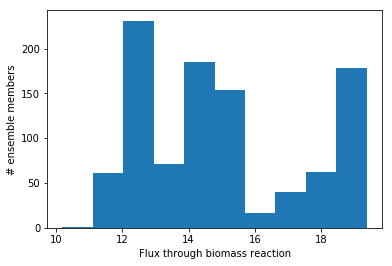

In [10]:
import matplotlib.pylab as plt
fig, ax = plt.subplots()
plt.hist(fluxes['bio1'])
ax.set_ylabel('# ensemble members')
ax.set_xlabel('Flux through biomass reaction')
plt.show()

You may want to perform simulations with only a subset of ensemble members. There are two options for this; either identifying the desired members for simulation with the `specific_models` parameter, or passing a number of random members to perform simulations with the `num_models` parameter.

In [14]:
# perform FBA with a random set of 10 members:
subflux = flux_balance.optimize_ensemble(ensemble, num_models = 10, return_flux = "bio1")
subflux

,bio1
Staphylococcus aureus_gapfilled_300,18.441010
Staphylococcus aureus_gapfilled_181,14.875922
Staphylococcus aureus_gapfilled_667,17.618230
Staphylococcus aureus_gapfilled_668,14.875922
Staphylococcus aureus_gapfilled_639,14.186860
Staphylococcus aureus_gapfilled_636,14.186860
Staphylococcus aureus_gapfilled_738,14.643953
Staphylococcus aureus_gapfilled_68,12.223456
Staphylococcus aureus_gapfilled_87,14.875922
Staphylococcus aureus_gapfilled_580,12.223456


In [15]:
submembers = [member.id for member in ensemble.members[0:10]]
print(submembers)
subflux = flux_balance.optimize_ensemble(ensemble, specific_models = submembers, return_flux = "bio1")
subflux

['Staphylococcus aureus_gapfilled_892', 'Staphylococcus aureus_gapfilled_851', 'Staphylococcus aureus_gapfilled_501', 'Staphylococcus aureus_gapfilled_927', 'Staphylococcus aureus_gapfilled_875', 'Staphylococcus aureus_gapfilled_500', 'Staphylococcus aureus_gapfilled_751', 'Staphylococcus aureus_gapfilled_849', 'Staphylococcus aureus_gapfilled_372', 'Staphylococcus aureus_gapfilled_421']


,bio1
Staphylococcus aureus_gapfilled_372,12.223456
Staphylococcus aureus_gapfilled_421,13.113148
Staphylococcus aureus_gapfilled_500,19.198765
Staphylococcus aureus_gapfilled_501,12.223456
Staphylococcus aureus_gapfilled_751,14.209162
Staphylococcus aureus_gapfilled_849,12.224814
Staphylococcus aureus_gapfilled_851,19.375070
Staphylococcus aureus_gapfilled_875,17.872504
Staphylococcus aureus_gapfilled_892,19.375070
Staphylococcus aureus_gapfilled_927,19.198765


## Flux Variability Analysis

## Gene and Reaction Deletions